In this notebook we will be using the Logistic Regression Model with different ways of splitting the training and testing data and save the best one

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
df = pd.read_csv('../data/processed_data.csv')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   float64
 5   PhoneService                           7043 non-null   int64  
 6   OnlineSecurity                         7043 non-null   int64  
 7   DeviceProtection                       7043 non-null   int64  
 8   TechSupport                            7043 non-null   int64  
 9   StreamingTV                            7043 non-null   int64  
 10  StreamingMovies                        7043 non-null   int64  
 11  Pape

First of all lets manually split the training and testing data with a 70% to 30% split and see its performance rates

In [8]:
X = df.drop('Churn',axis=1)
y = df['Churn']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

y_pred_log = log_reg.predict(X_test)

print(accuracy_score(y_test,y_pred_log))
print(confusion_matrix(y_test,y_pred_log))
print(classification_report(y_test,y_pred_log))

0.8116422148603881
[[1388  151]
 [ 247  327]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.80      0.81      0.81      2113



Now we will use a radnom split 

In [10]:
X = df.drop('Churn',axis=1)
y = df['Churn']

X_train_RS,X_test_RS,y_train_RS,y_test_RS = train_test_split(X, y, test_size=0.3,shuffle=True, random_state=42)

In [11]:
log_reg_RS = LogisticRegression()
log_reg_RS.fit(X_train_RS,y_train_RS)

y_pred_log_RS = log_reg_RS.predict(X_test_RS)

print(accuracy_score(y_test_RS,y_pred_log_RS))
print(confusion_matrix(y_test_RS,y_pred_log_RS))
print(classification_report(y_test_RS,y_pred_log_RS))

0.8116422148603881
[[1388  151]
 [ 247  327]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.80      0.81      0.81      2113



Now we will use random split but with stratification

In [12]:
X = df.drop('Churn',axis=1)
y = df['Churn']

X_train_RSS,X_test_RSS,y_train_RSS,y_test_RSS = train_test_split(X, y, test_size=0.3,shuffle=True,stratify=y, random_state=42)

In [13]:
log_reg_RSS = LogisticRegression()
log_reg_RSS.fit(X_train_RSS,y_train_RSS)

y_pred_log_RSS = log_reg_RSS.predict(X_test_RSS)

print(accuracy_score(y_test_RSS,y_pred_log_RSS))
print(confusion_matrix(y_test_RSS,y_pred_log_RSS))
print(classification_report(y_test_RSS,y_pred_log_RSS))

0.8102224325603408
[[1397  155]
 [ 246  315]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1552
           1       0.67      0.56      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



And finally we will be using cross validation 

In [17]:
log_reg_cv = LogisticRegression()
cv_scores = cross_val_score(log_reg_cv, X, y, cv=10, scoring='accuracy')
print("\nCross-Validation Results")
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")


Cross-Validation Results
Cross-validation scores: [0.79858156 0.80992908 0.80425532 0.81818182 0.78125    0.79829545
 0.8125     0.80965909 0.79971591 0.80681818]
Mean cross-validation score: 0.8039186411992263


In [22]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Score: {grid_search.best_score_}")
best_log_reg_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_log_reg_model.predict(X_test)
print("Best Model Performance on Test Data")
print(accuracy_score(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

C:\Users\david\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\david\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\david\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\david\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\david\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\david\

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-validation Score: 0.8036511156186613
Best Model Performance on Test Data
0.812588736393753
[[1388  151]
 [ 245  329]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1539
           1       0.69      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.81      0.81      0.81      2113



Now lets do a comparisson between all the models we trained

In [23]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred, output_dict=True)
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': report['macro avg']['precision'],
        'Recall': report['macro avg']['recall'],
        'F1 Score': report['macro avg']['f1-score'],
        'Confusion Matrix': confusion
    }

# Evaluate all models
manual_split_results = evaluate_model(y_test, y_pred_log, 'Manual Split')
random_split_results = evaluate_model(y_test_RS, y_pred_log_RS, 'Random Split')
stratified_split_results = evaluate_model(y_test_RSS, y_pred_log_RSS, 'Stratified Random Split')
tuned_model_results = evaluate_model(y_test, y_pred_best, 'Tuned Model')

# Collect all results
comparison_results = [manual_split_results, random_split_results, stratified_split_results, tuned_model_results]

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(comparison_results)
print("\nModel Comparison Results")
print(comparison_df)


Model Comparison Results
                     Model  Accuracy  Precision    Recall  F1 Score  \
0             Manual Split  0.811642   0.766515  0.735785  0.748140   
1             Random Split  0.811642   0.766515  0.735785  0.748140   
2  Stratified Random Split  0.810222   0.760243  0.730813  0.742774   
3              Tuned Model  0.812589   0.767693  0.737528  0.749723   

            Confusion Matrix  
0  [[1388, 151], [247, 327]]  
1  [[1388, 151], [247, 327]]  
2  [[1397, 155], [246, 315]]  
3  [[1388, 151], [245, 329]]  


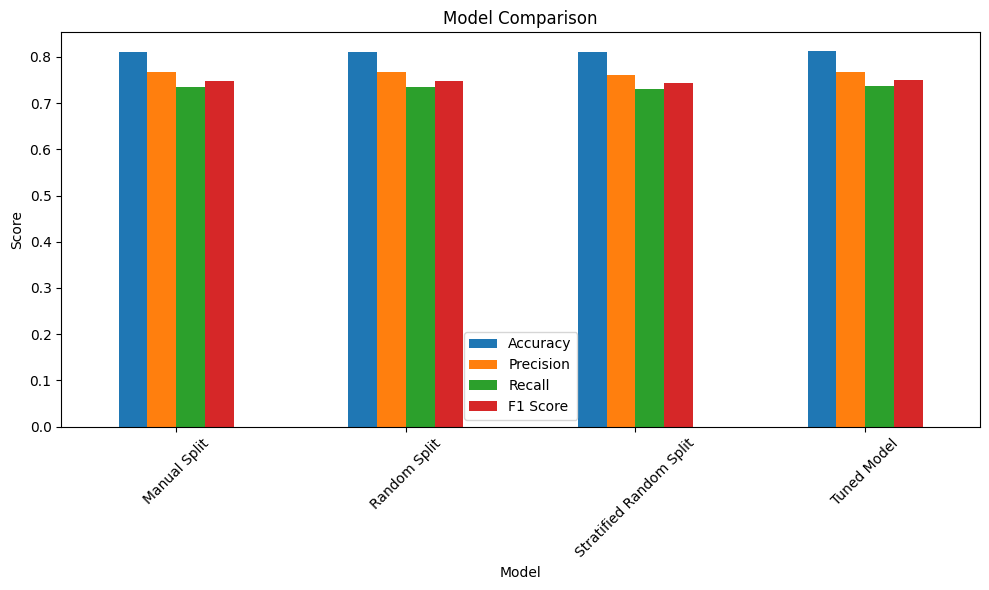

In [24]:
comparison_df.set_index('Model', inplace=True)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
comparison_df[metrics].plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the result we see that the hyperparammeter trained model that uses cross validation seems to be the best, so for now we will save it

In [25]:
import joblib
joblib.dump(best_log_reg_model, 'best_log_reg_model.pkl')

['best_log_reg_model.pkl']